### Carregando arquivos:

In [4]:
import pandas as pd

train_df  = pd.read_csv("../../data/raw/train.csv")
unique_m_df = pd.read_csv("../../data/raw/unique_m.csv")

### Features escolhidas:

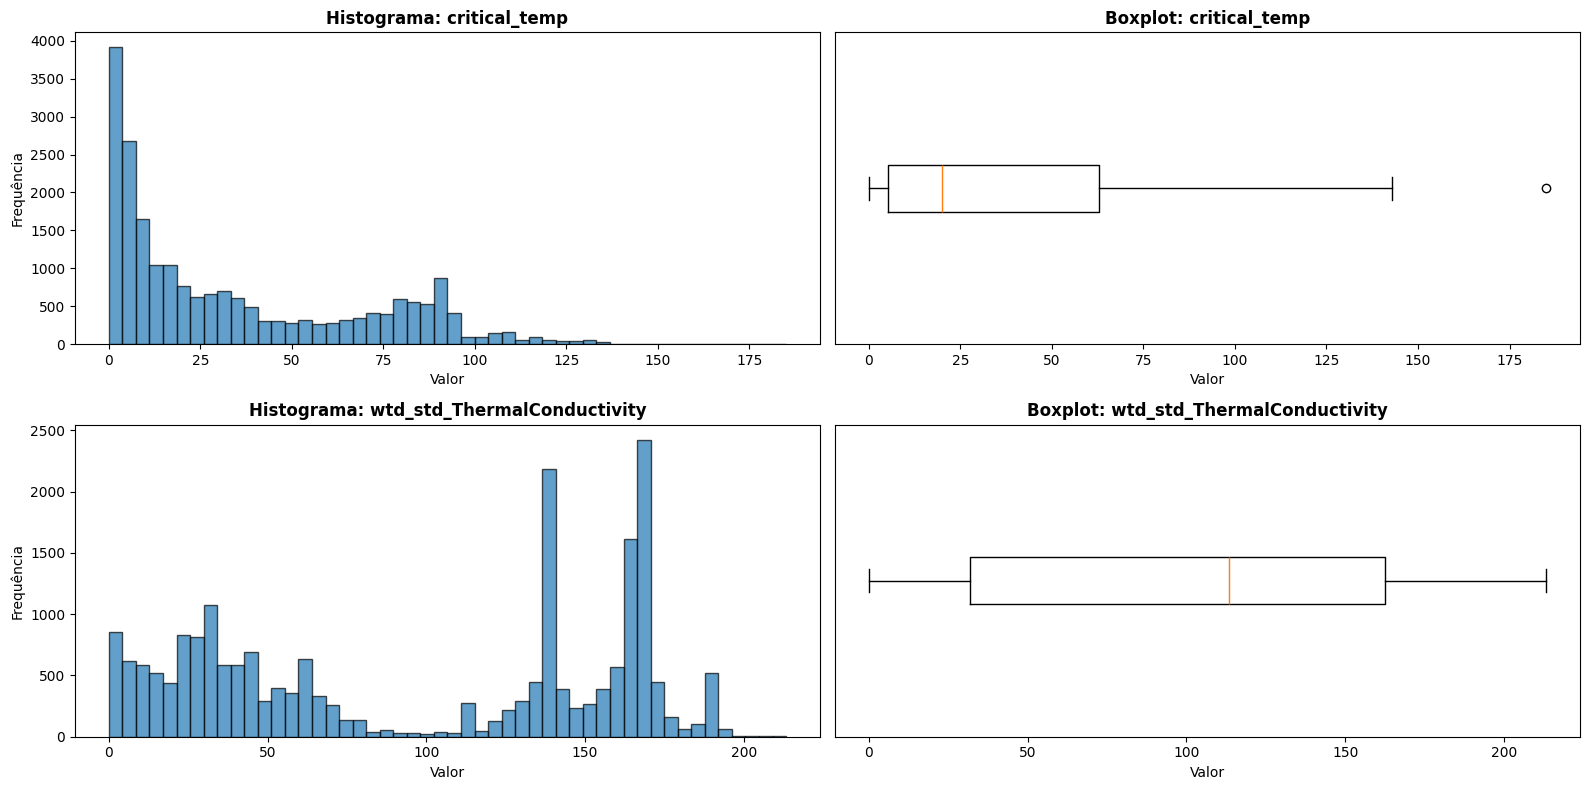

In [5]:
import matplotlib.pyplot as plt
import numpy as np

features = [
    'critical_temp',
    'wtd_std_ThermalConductivity'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 8))  # 2 features, 2 gráficos cada (hist + box)
axes = axes.flatten()

for i, feature in enumerate(features):
    dados_array = np.array(train_df[feature])

    # Histograma (esquerda)
    ax_hist = axes[2*i]
    ax_hist.hist(dados_array, bins=50, edgecolor='black', alpha=0.7)
    ax_hist.set_title(f'Histograma: {feature}', fontsize=12, fontweight='bold')
    ax_hist.set_xlabel('Valor')
    ax_hist.set_ylabel('Frequência')

    # Boxplot (direita)
    ax_box = axes[2*i+1]
    ax_box.boxplot(dados_array, vert=False)
    ax_box.set_title(f'Boxplot: {feature}', fontsize=12, fontweight='bold')
    ax_box.set_xlabel('Valor')
    ax_box.set_yticks([]) 

plt.tight_layout()
plt.show()

### Tratamento de features:

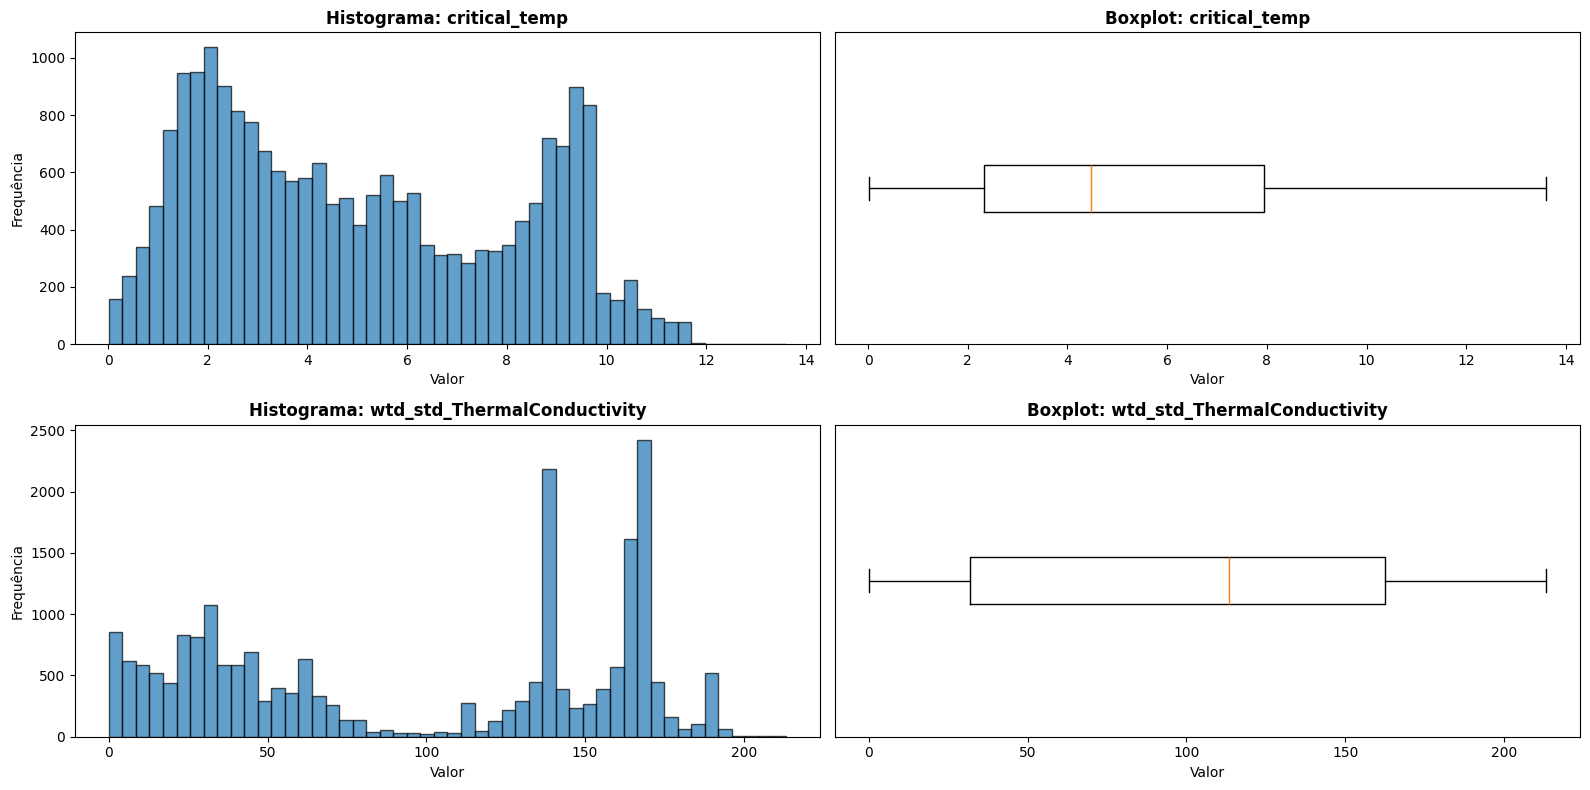

In [7]:
import pickle
import os

# Carregando dados em formato array:

crit_temp_array = np.array(train_df['critical_temp'])
thermal_cond_array = np.array(train_df['wtd_std_ThermalConductivity'])

# Tratamento de dados:

crit_temp_array = np.sqrt(crit_temp_array)
# thermal_cond_array = np.sqrt(thermal_cond_array)

lista_features_array = [crit_temp_array, thermal_cond_array]
lista_features = ['critical_temp', 'wtd_std_ThermalConductivity']

# Plotando:

fig, axes = plt.subplots(2, 2, figsize=(16, 8))  # 2 features, 2 gráficos cada (hist + box)
axes = axes.flatten()

for i, feature in enumerate(lista_features):

    # Histograma (esquerda)
    ax_hist = axes[2*i]
    ax_hist.hist(lista_features_array[i], bins=50, edgecolor='black', alpha=0.7)
    ax_hist.set_title(f'Histograma: {feature}', fontsize=12, fontweight='bold')
    ax_hist.set_xlabel('Valor')
    ax_hist.set_ylabel('Frequência')

    # Boxplot (direita)
    ax_box = axes[2*i+1]
    ax_box.boxplot(lista_features_array[i], vert=False)
    ax_box.set_title(f'Boxplot: {feature}', fontsize=12, fontweight='bold')
    ax_box.set_xlabel('Valor')
    ax_box.set_yticks([]) 

plt.tight_layout()
plt.show()

# Garante que a pasta existe
os.makedirs("features_tratadas", exist_ok=True)

# Salva as variáveis:
with open('features_tratadas/critic_temp.pkl', 'wb') as f:
    pickle.dump(crit_temp_array, f)
with open('features_tratadas/thermal_cond.pkl', 'wb') as f:
    pickle.dump(thermal_cond_array, f)